# 12CA Analysis 

In [1]:
%pylab inline 
import pandas as pd 
import glob 
import seaborn as sns 

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('12ca_rmsd.dat','r') as infile:
    ls_x,ls_y = [], []
    for line in infile:
        if line.startswith('#'):
            continue 
        x,y = line.split()
        ls_x.append(x)
        ls_y.append(y)
    x = np.array(ls_x,dtype=int)
    y = np.array(ls_y,dtype=float)
    

# RMSD of CRYSTAL STRUCTURE

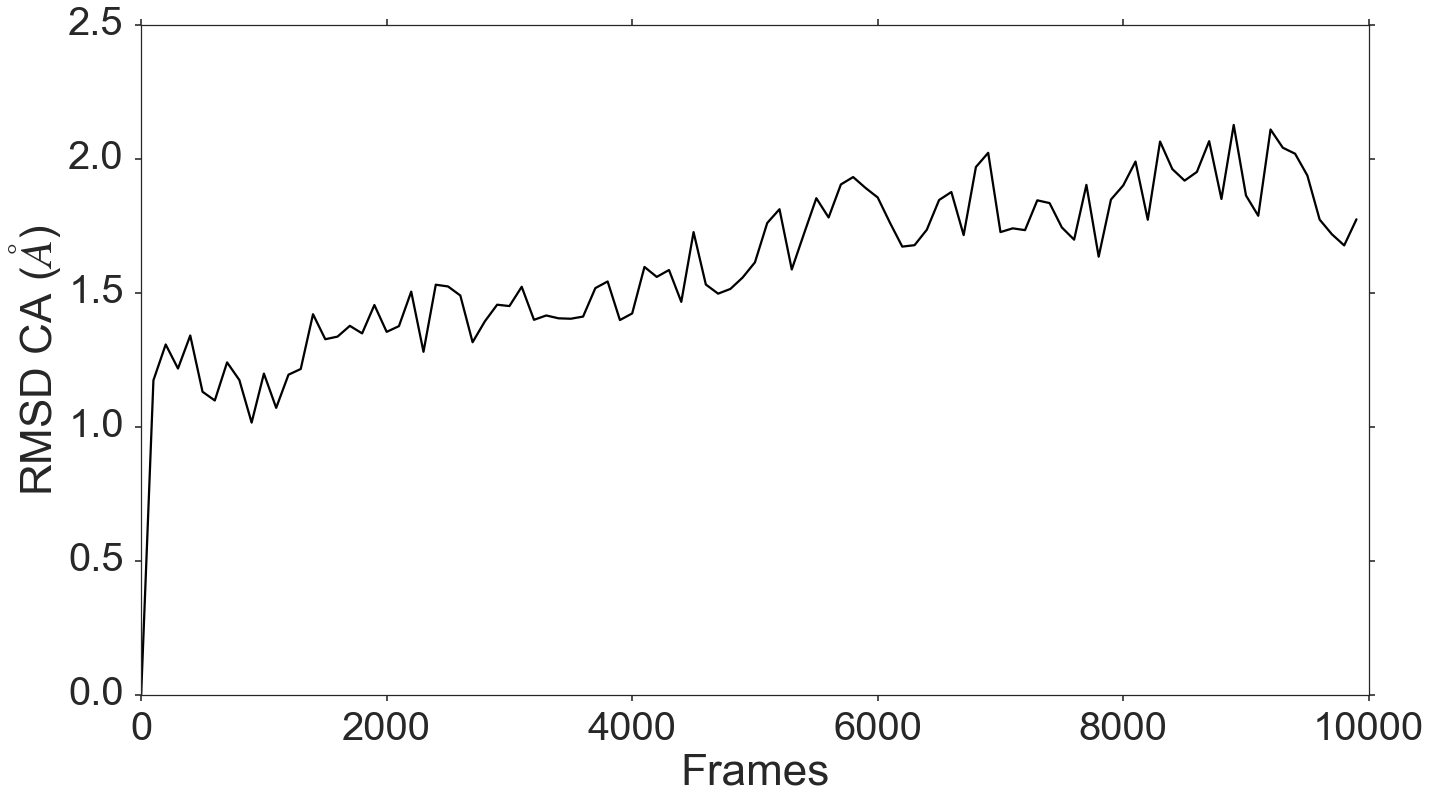

In [3]:
sns.set_style('ticks')
plt.figure(figsize=(22,12))
sns.set_context("poster", font_scale=2.5, rc={"lines.linewidth": 2.25, "lines.markersize": 8 })
plot(x[::100],y[::100],linewidth=2.25,color='black')
plt.ylabel(r'RMSD CA ($\AA$)')
plt.xlabel('Frames')

In [4]:
csvfiles = glob.glob('12ca_*-dfianalysis.csv')
titles = map(lambda x: x.replace('12ca_','').replace('-dfianalysis.csv',''),csvfiles)
data = pd.concat( [pd.read_csv(fname, index_col='ResI') for fname in csvfiles], keys=titles, names=['window','ResI'])

In [5]:
df_windows = pd.DataFrame()
for win, df_dfi in data.groupby(level=0):
    df_windows[win] = df_dfi.ix[:].reset_index().set_index('ResI').pctdfi
    

In [6]:
ls_CSAsites = [64,106,199] 
df_CSA = df_windows.ix[ls_CSAsites]

In [7]:
df_CSA.head()

,0_1000,0_2500,0_500,1000_1500,1000_2000,1500_2000,2000_2500,2000_3000,2500_3000,2500_5000,...,7000_8000,7500_10000,7500_8000,8000_8500,8000_9000,8500_9000,9000_10000,9000_9500,9500_10000,ENM
ResI,,,,,,,,,,,,,,,,,,,,,
64,0.235294,0.878431,0.443137,0.701961,0.760784,0.788235,0.862745,0.831373,0.509804,0.600000,...,0.050980,0.313725,0.113725,0.070588,0.141176,0.329412,0.545098,0.517647,0.427451,0.686275
106,0.062745,0.274510,0.313725,0.007843,0.094118,0.227451,0.149020,0.117647,0.039216,0.125490,...,0.039216,0.098039,0.035294,0.184314,0.027451,0.054902,0.156863,0.454902,0.250980,0.098039
199,0.027451,0.015686,0.090196,0.215686,0.035294,0.078431,0.007843,0.023529,0.141176,0.047059,...,0.235294,0.219608,0.227451,0.305882,0.211765,0.184314,0.180392,0.431373,0.184314,0.270588


# %DFI of CSA sites for all windows 

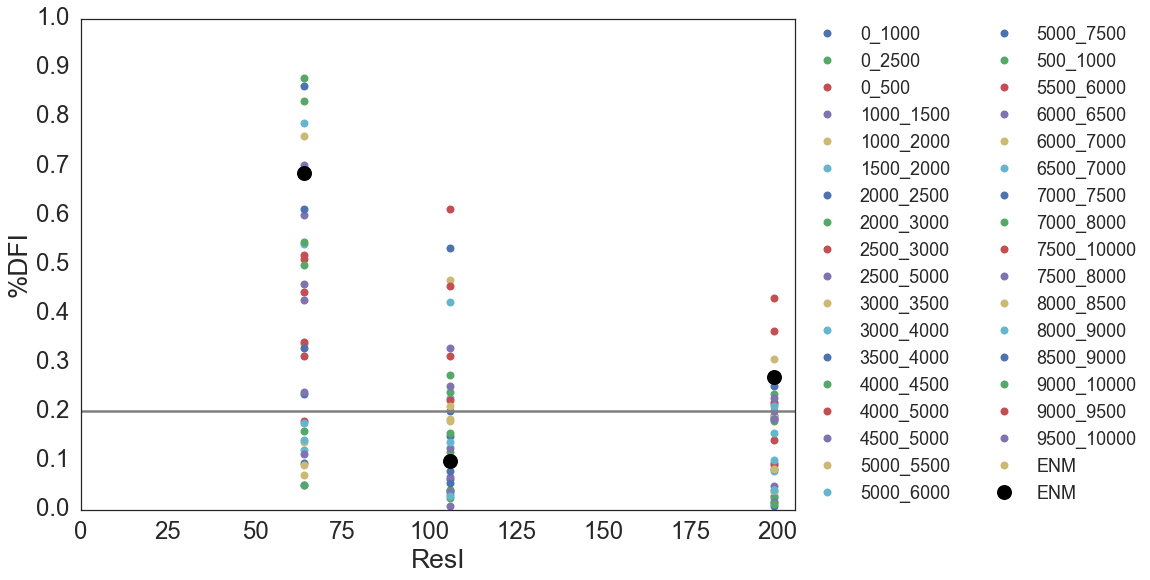

In [8]:
sns.set_style('white')
plt.figure(figsize=(32,18))
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 1.25, "lines.markersize": 8 })
df_CSA[df_CSA.columns[:]].plot(marker='o',linestyle='')
df_CSA['ENM'].plot(marker='o', linestyle='',markersize=15,color='black')
plt.xlim(0,205)
plt.ylabel('%DFI')
plt.ylim(0.,1.)
plt.yticks(np.array(range(11))/10. )
plt.xticks(np.array(range(0,225,25)))
plt.axhline(y=.2, color = 'grey',linewidth=2.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=2, borderaxespad=0.,fontsize=18)

In [9]:
def deltat(time):
    if time == 'ENM':
        return 0 
    start, end = time.split('_')
    return abs(int(start) - int(end))
df_CSAT = df_CSA.T.copy()
df_CSAT['deltaT'] = df_CSAT.index.map(lambda x: deltat(x) )

# 5ns Windows

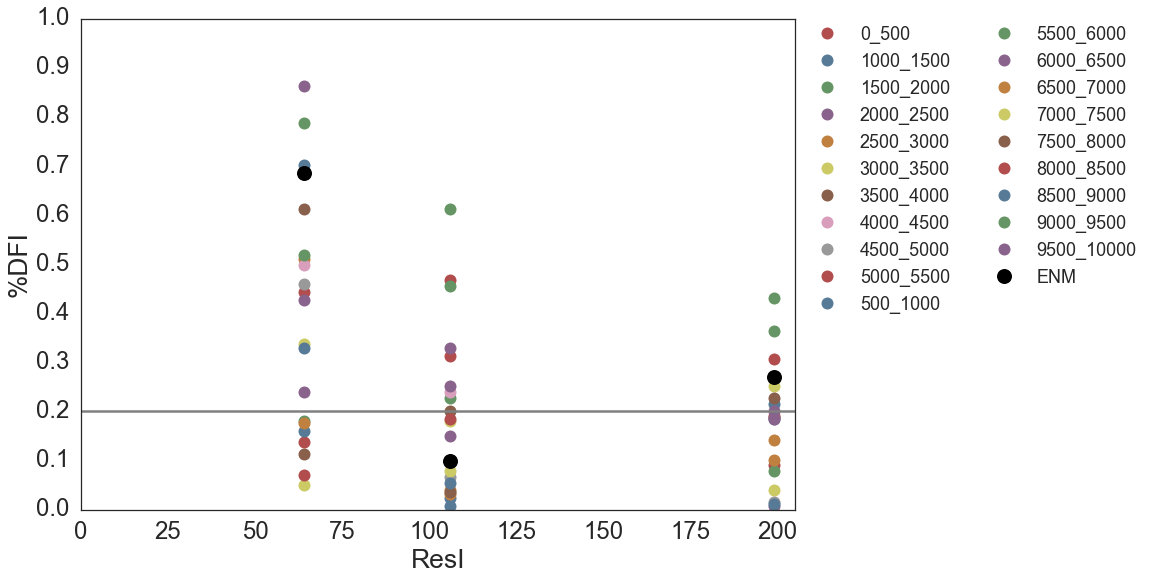

In [10]:

c = sns.color_palette("Set1", n_colors=16, desat=.5)
df_CSAT.groupby('deltaT').get_group(500)[ls_CSAsites].T.plot(marker='o',linestyle='',color=c, markersize=12)
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 1.25, "lines.markersize": 8 })
df_CSA['ENM'].plot(marker='o', linestyle='',markersize=15,color='black')
plt.xlim(0,205)
plt.ylabel('%DFI')
plt.ylim(0.,1.)
plt.yticks(np.array(range(11))/10. )
plt.xticks(np.array(range(0,225,25)))
plt.axhline(y=.2, color = 'grey',linewidth=2.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=2, borderaxespad=0.,fontsize=18)

# 10ns Windows

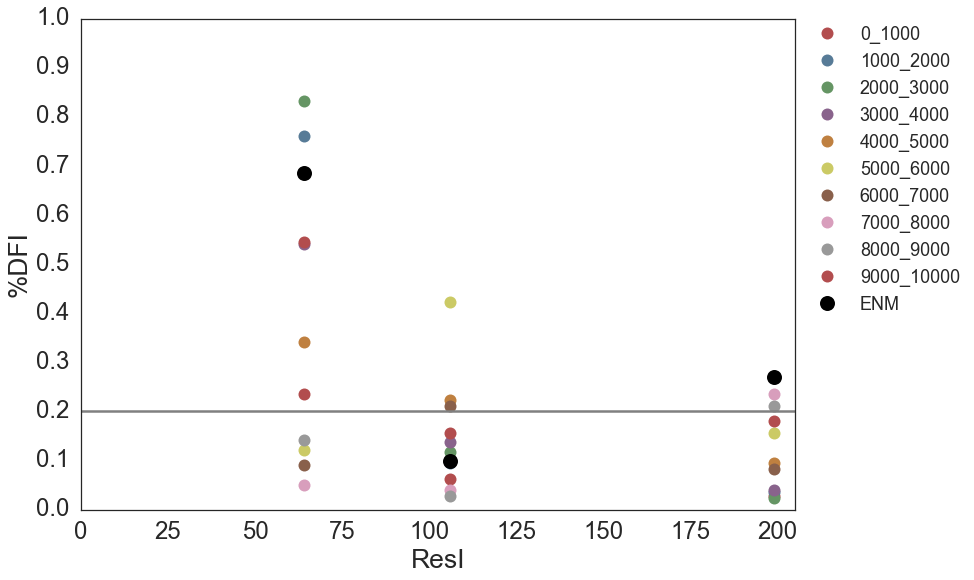

In [11]:

c = sns.color_palette("Set1", n_colors=12, desat=.5)
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 1.25, "lines.markersize": 8 })
df_CSAT.groupby('deltaT').get_group(1000)[ls_CSAsites].T.plot(marker='o',linestyle='',color=c,markersize=12)
df_CSA['ENM'].plot(marker='o', linestyle='',markersize=15,color='black')
plt.xlim(0,205)
plt.ylabel('%DFI')
plt.ylim(0.,1.)
plt.yticks(np.array(range(11))/10. )
plt.xticks(np.array(range(0,225,25)))
plt.axhline(y=.2, color = 'grey',linewidth=2.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=1, borderaxespad=0.,fontsize=18)

# 25ns Windows

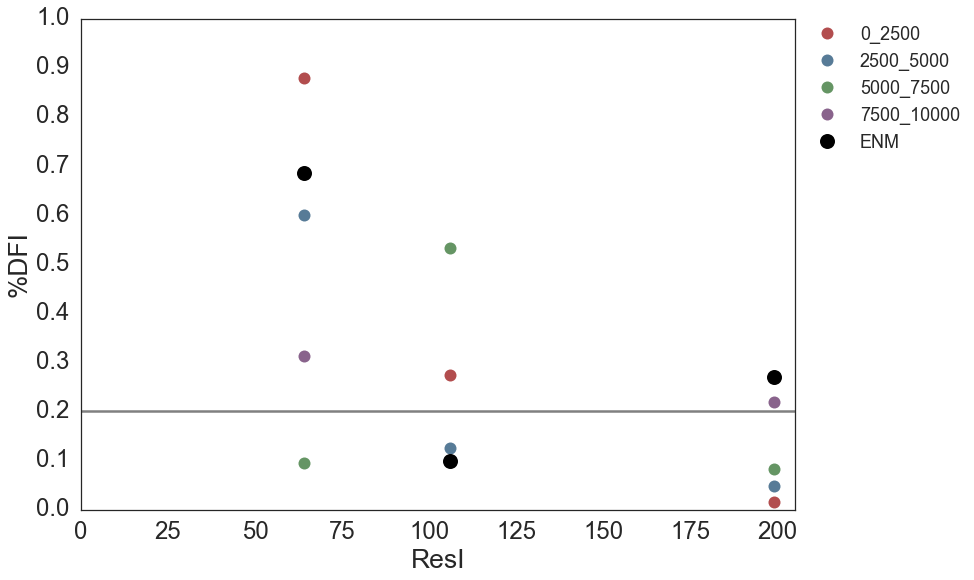

In [12]:

sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 1.25, "lines.markersize": 8 })
c = sns.color_palette("Set1", n_colors=12, desat=.5)
df_CSAT.groupby('deltaT').get_group(2500)[ls_CSAsites].T.plot(marker='o',linestyle='',color=c,markersize=12)
df_CSA['ENM'].plot(marker='o', linestyle='',markersize=15,color='black')
plt.xlim(0,205)
plt.ylabel('%DFI')
plt.ylim(0.,1.)
plt.yticks(np.array(range(11))/10. )
plt.xticks(np.array(range(0,225,25)))
plt.axhline(y=.2, color = 'grey',linewidth=2.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=1, borderaxespad=0.,fontsize=18)

# Correlation of all windows with ENM

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.]),
 <a list of 8 Text xticklabel objects>)

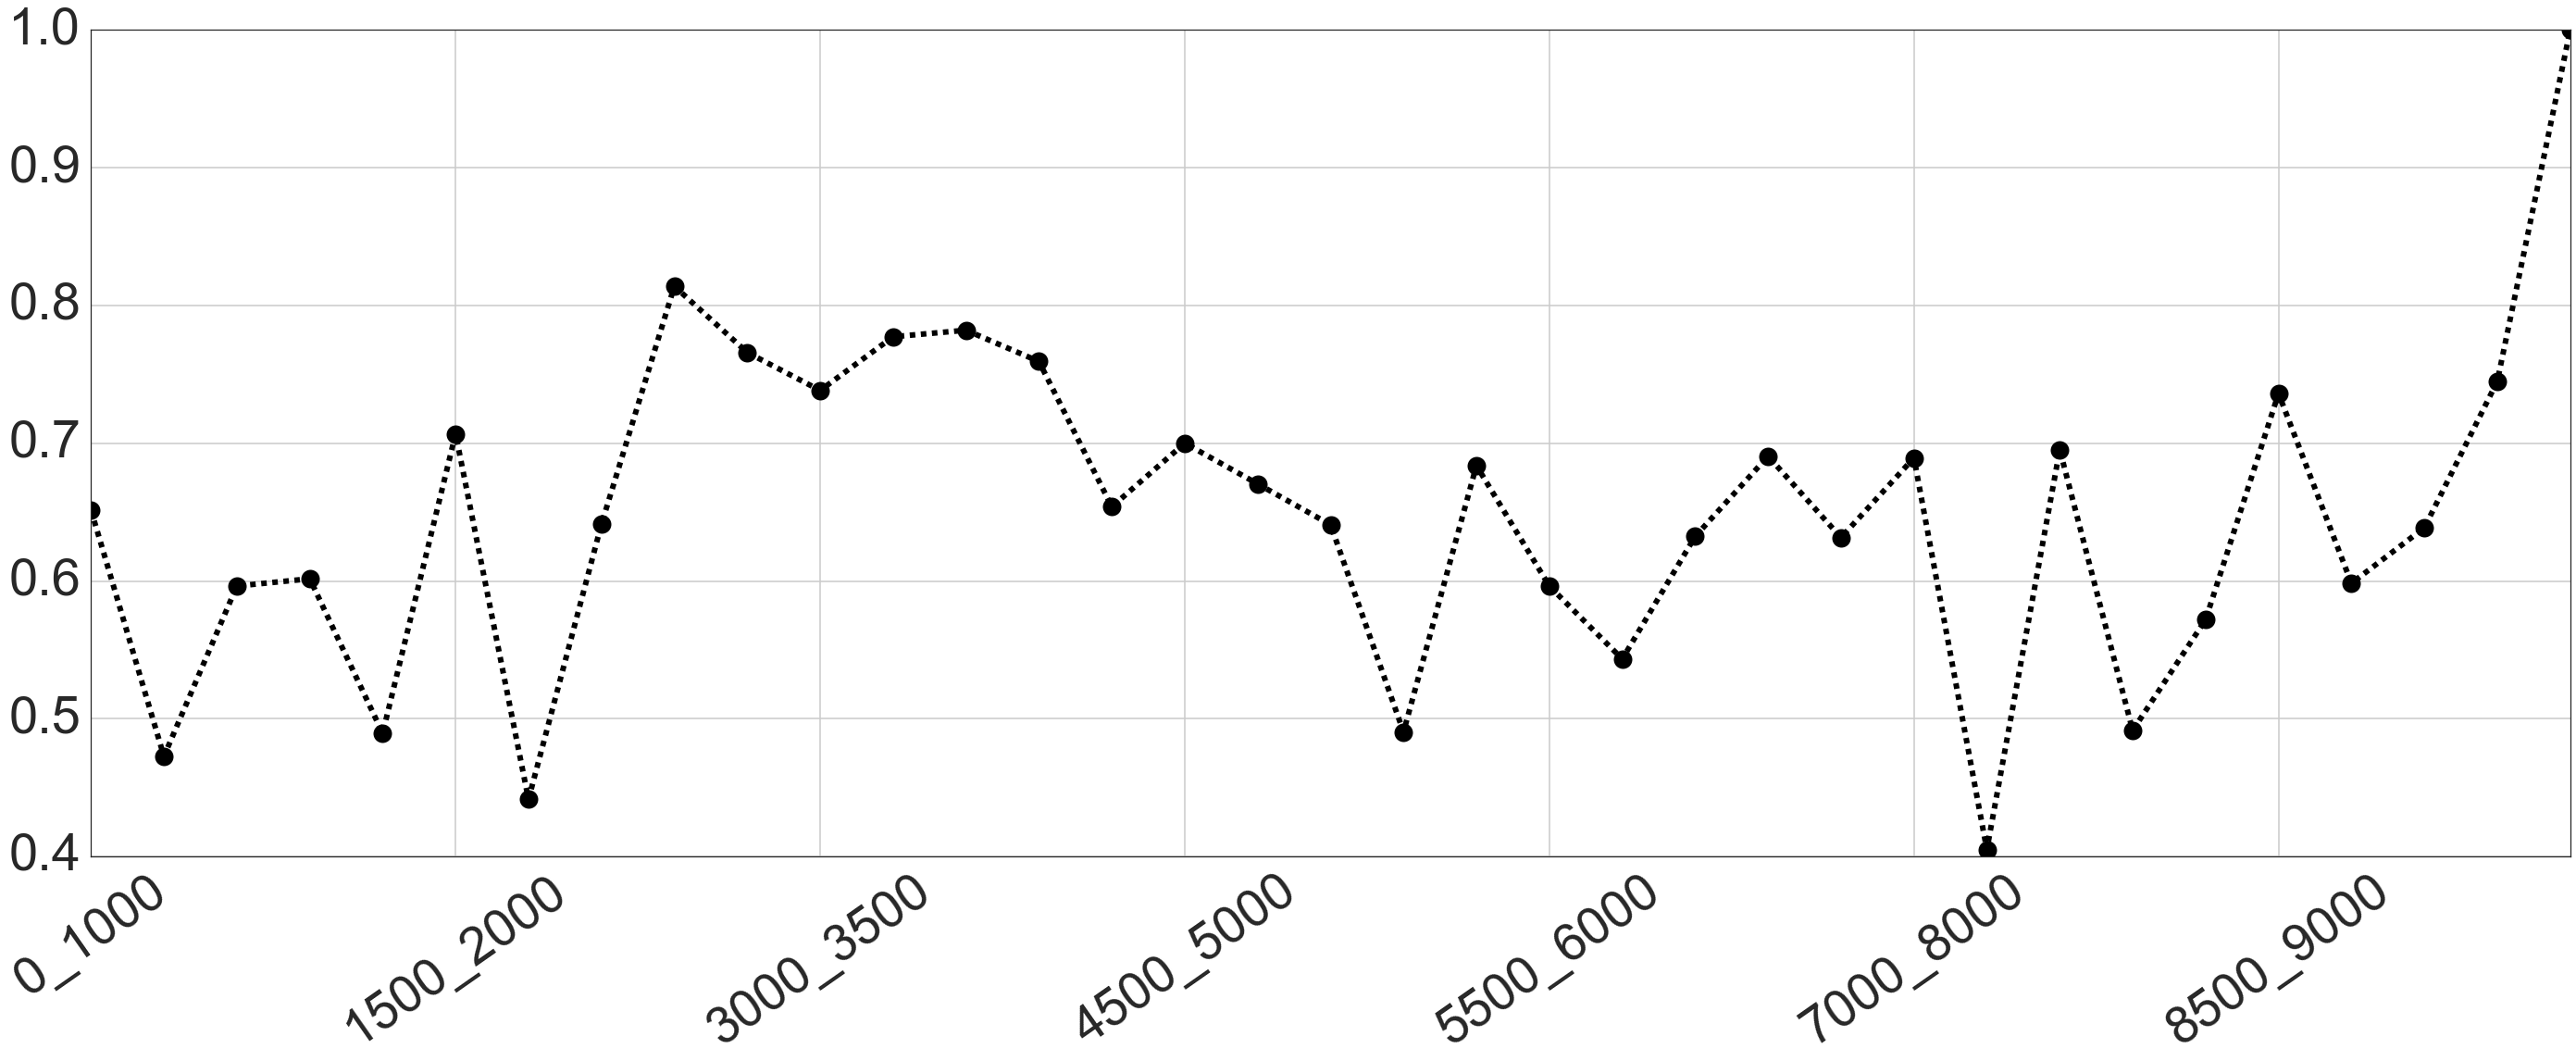

In [13]:
plt.figure(figsize=(48,16))
sns.set_context("poster", font_scale=3.5, rc={"lines.linewidth": 2.25, "lines.markersize": 8 })
df_windows.corr().ix['ENM'].plot(linestyle='dashed',marker='o',markersize=20,grid='on',linewidth=6,color='black')
plt.xticks(rotation=35.)

In [14]:
pd_corr = pd.DataFrame( df_windows.corr().ix['ENM'] )

pd_corr.index.name='window'

pd_corr['deltat'] = pd_corr.index.map(deltat)

# 5ns windows  correlation with ENM

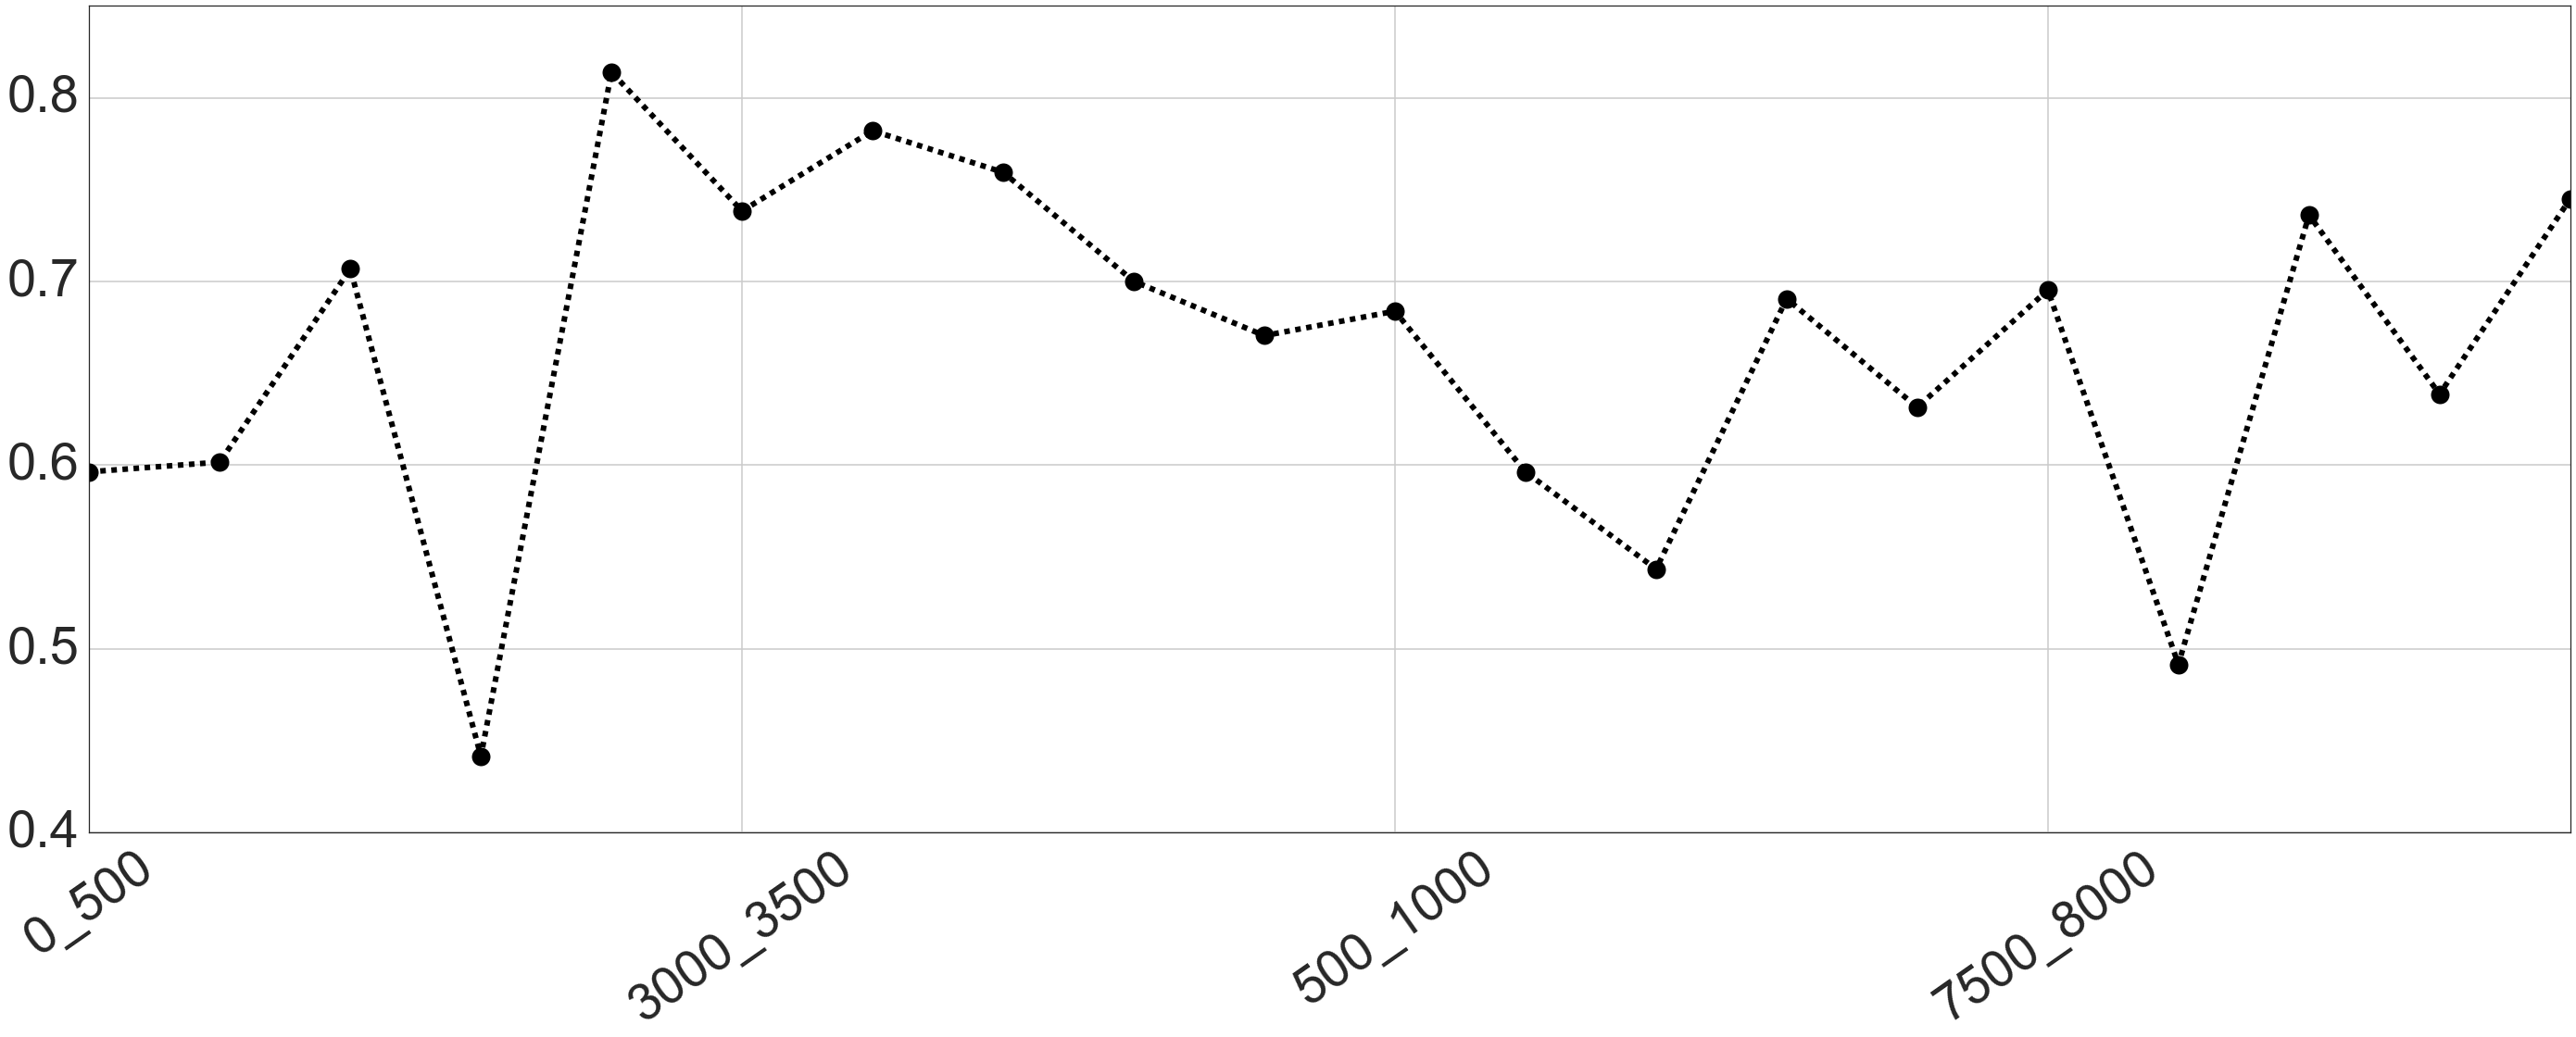

In [15]:
plt.figure(figsize=(48,16))
sns.set_context("poster", font_scale=3.5, rc={"lines.linewidth": 2.25, "lines.markersize": 8 })
pd_corr.groupby('deltat').get_group(500)['ENM'].plot(linestyle='dashed',marker='o',markersize=20,grid='on',
                                                    linewidth=6,color='black')
plt.xticks(rotation=35.)
plt.xlabel('')

# 10ns correlation with ENM

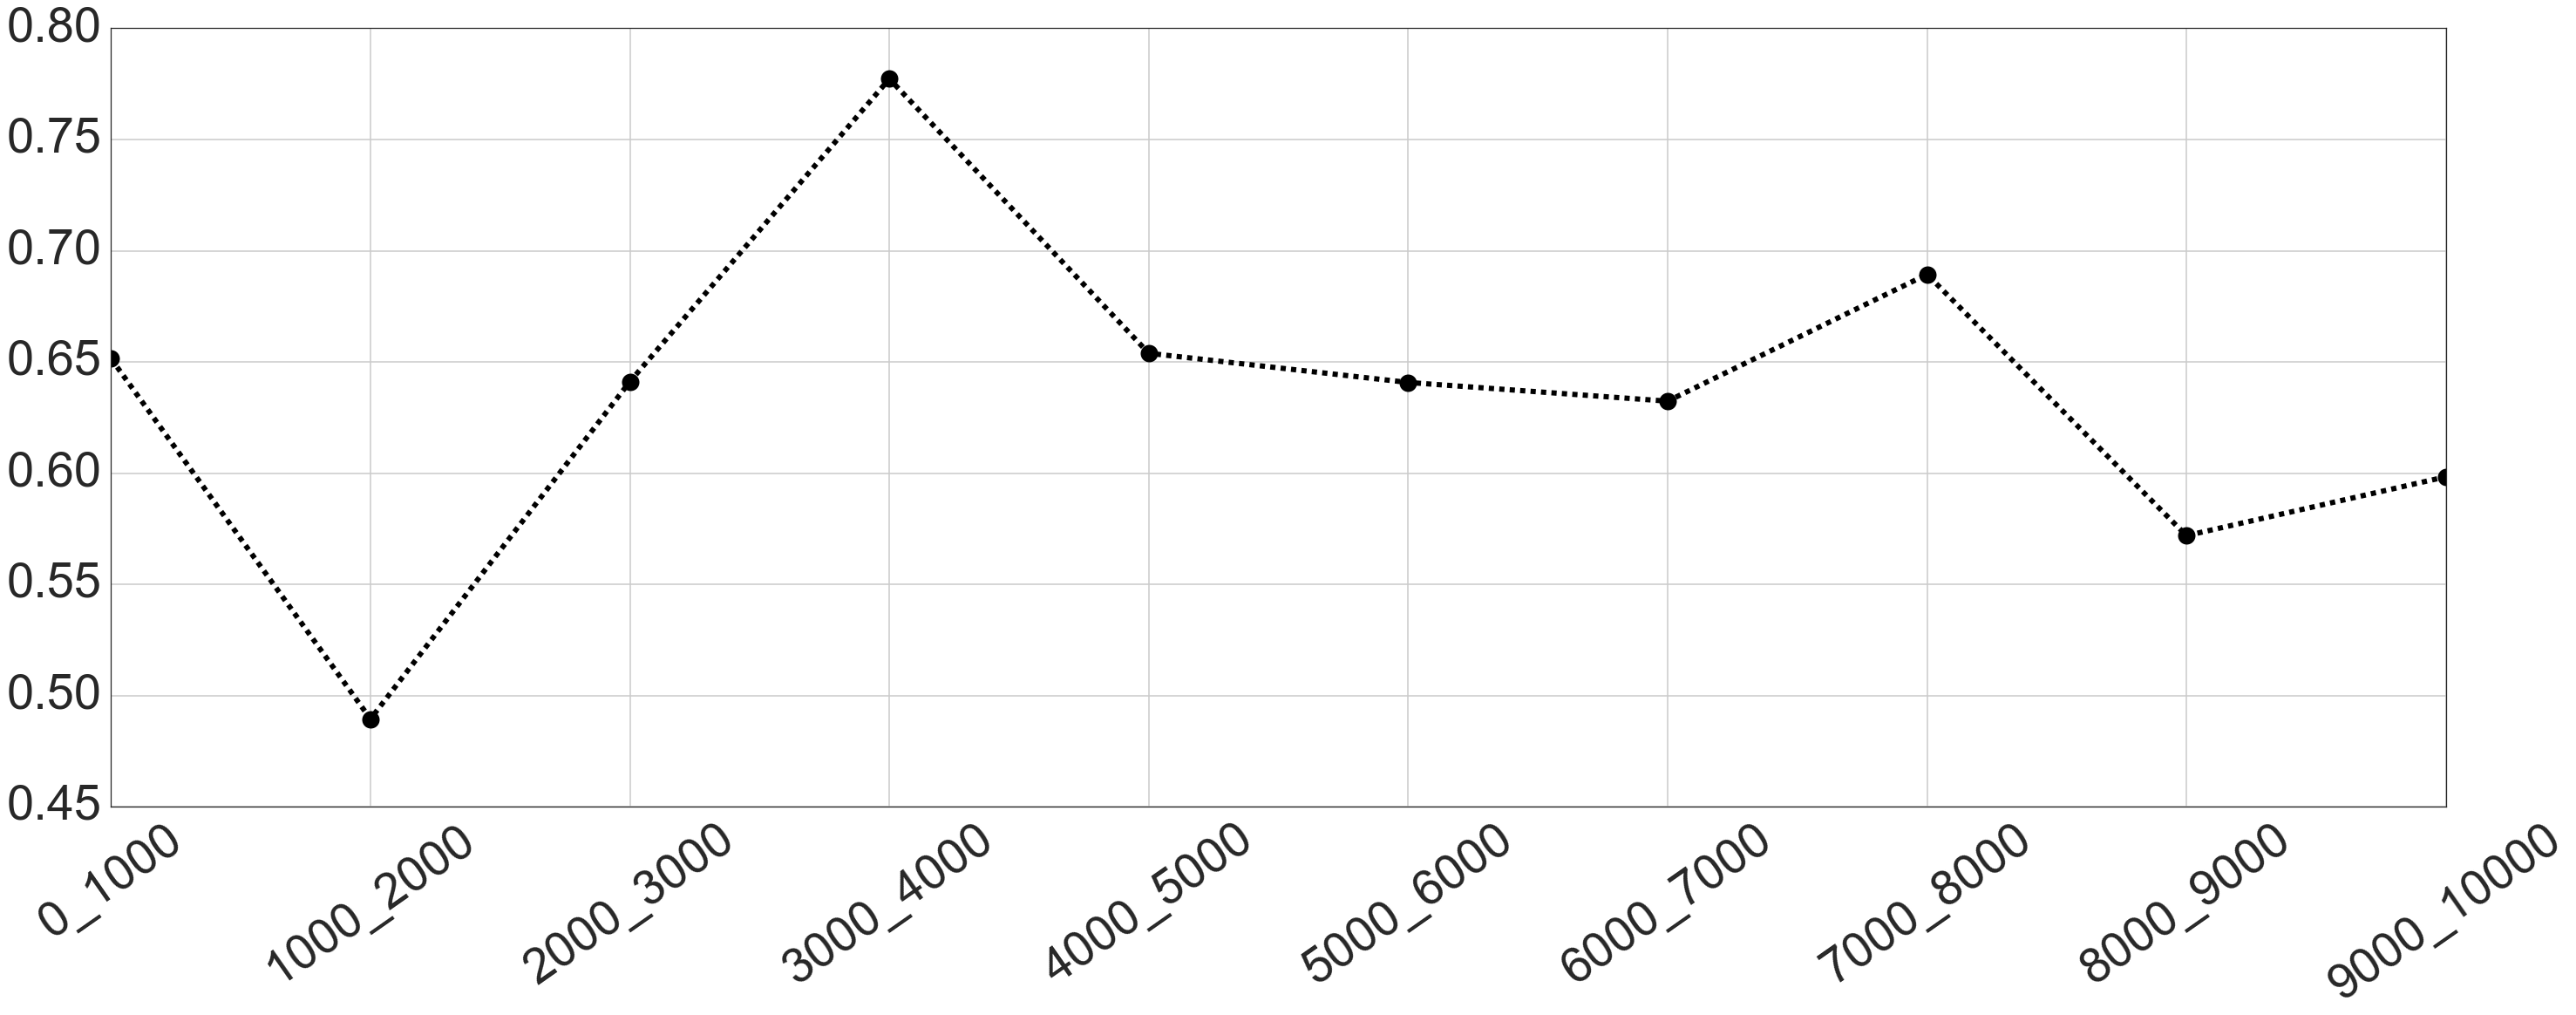

In [16]:
plt.figure(figsize=(48,16))
sns.set_context("poster", font_scale=3.5, rc={"lines.linewidth": 2.25, "lines.markersize": 8 })
pd_corr.groupby('deltat').get_group(1000)['ENM'].plot(linestyle='dashed',marker='o',markersize=20,grid='on',
                                                    linewidth=6,color='black')
plt.xticks(rotation=35.)
plt.xlabel('')

# 25ns correlation with ENM

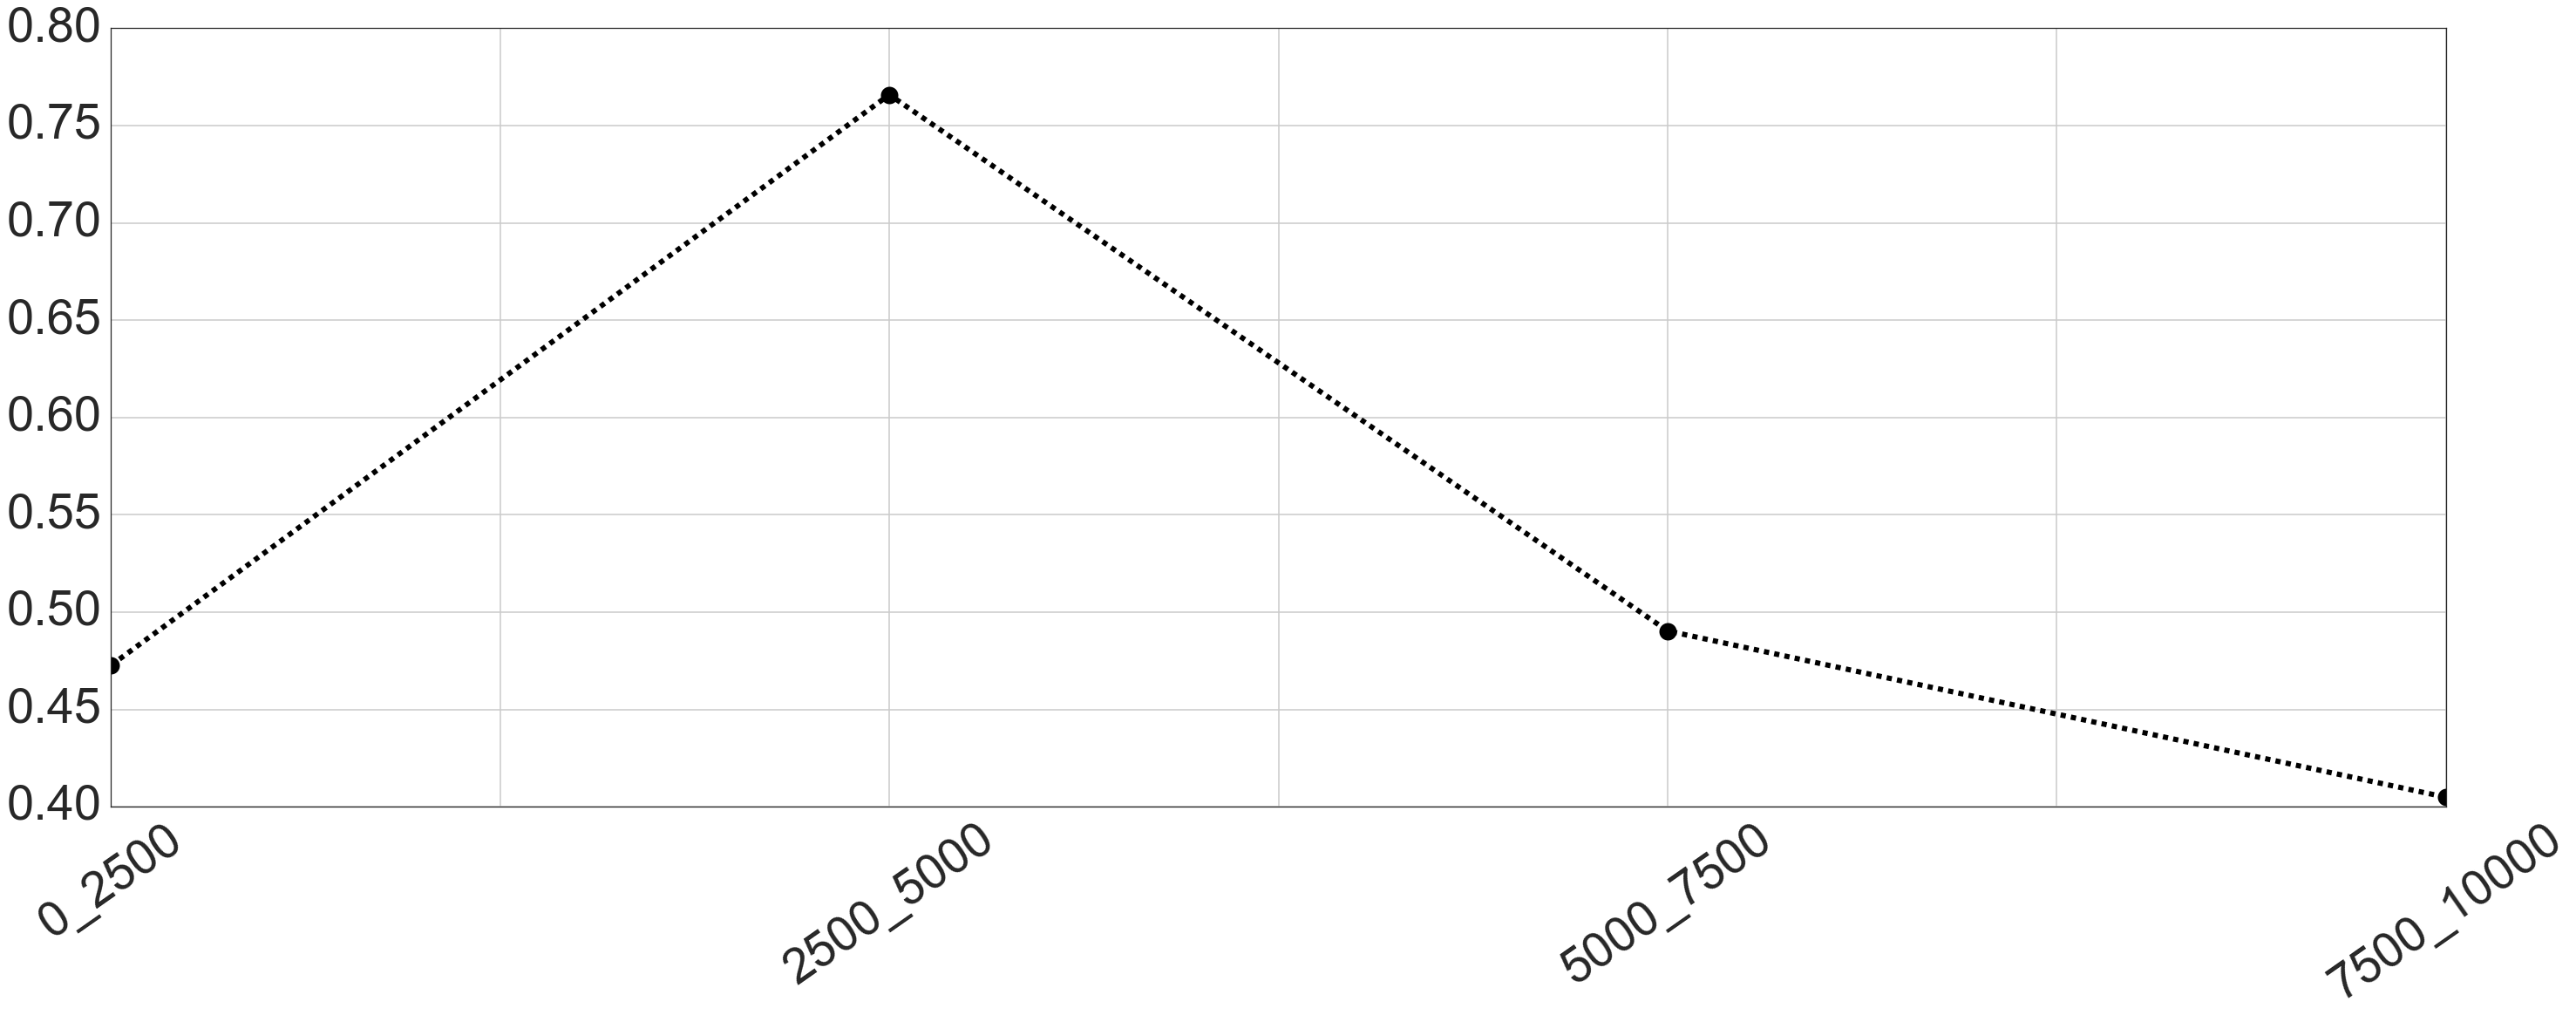

In [17]:
plt.figure(figsize=(48,16))
sns.set_context("poster", font_scale=3.5, rc={"lines.linewidth": 2.25, "lines.markersize": 8 })
pd_corr.groupby('deltat').get_group(2500)['ENM'].plot(linestyle='dashed',marker='o',markersize=20,grid='on',
                                                    linewidth=6,color='black')
plt.xticks(rotation=35.)
plt.xlabel('')

# CSA sites of the highest correlated windows with ENM

In [18]:
pd_corr.sort_values(by='ENM',ascending=False).head()

,ENM,deltat
window,,
ENM,1.000000,0
2500_3000,0.813941,500
3500_4000,0.782054,500
3000_4000,0.777299,1000
2500_5000,0.765917,2500


In [19]:
df_CSA[['ENM','2500_3000','3500_4000','3000_4000','2500_5000']]

,ENM,2500_3000,3500_4000,3000_4000,2500_5000
ResI,,,,,
64,0.686275,0.509804,0.611765,0.541176,0.600000
106,0.098039,0.039216,0.200000,0.137255,0.125490
199,0.270588,0.141176,0.188235,0.039216,0.047059


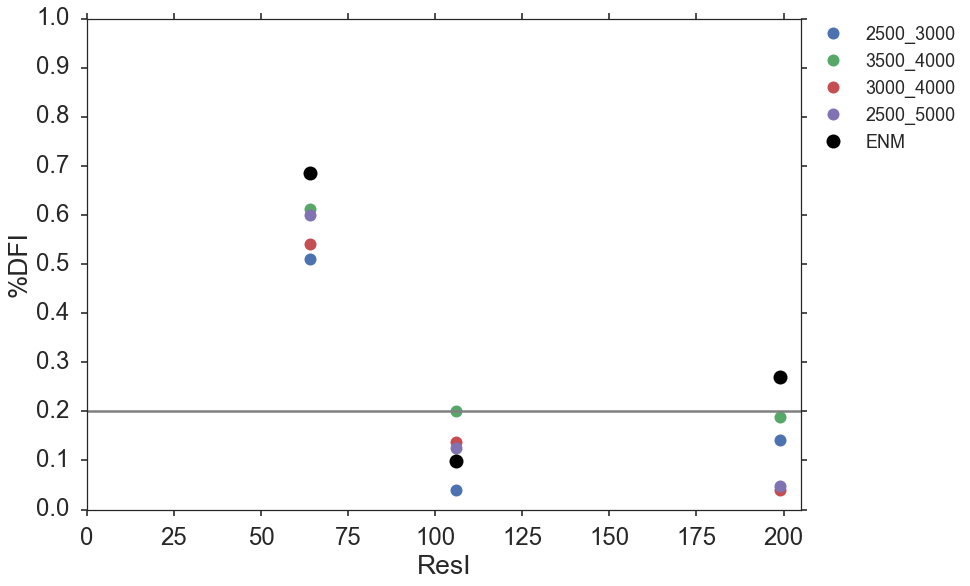

In [20]:
sns.set_style('ticks')
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 1.25, "lines.markersize": 8 })
c = sns.color_palette("Set1", n_colors=12, desat=.5)
df_CSA[['2500_3000','3500_4000','3000_4000','2500_5000']].plot(marker='o',linestyle='',markersize=12)
df_CSA.ENM.plot(marker='o',linestyle='',markersize=14,color='black')
plt.xlim(0,205)
plt.ylabel('%DFI')
plt.ylim(0.,1.)
plt.yticks(np.array(range(11))/10. )
plt.xticks(np.array(range(0,225,25)))
plt.axhline(y=.2, color = 'grey',linewidth=2.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=1, borderaxespad=0.,fontsize=18)